In [35]:
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from functions import delays
import sys

In [36]:
time_novelties_6 = np.loadtxt('novelties_s6.txt').astype(int)

In [37]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay

In [41]:
time = 10**6
bins_dimension = 1000
bins = np.arange(int(time/bins_dimension)+1)*bins_dimension

In [42]:
waiting_times = delays(time_novelties_6,True)

In [43]:
novelties_binned = []
support = [k for k in time_novelties_6 if k <=bins[1] and k > bins[0]]
novelties_binned.append(support)
last_novelty = support[-1]
for j in range(1,len(bins)-1):
    support = [k for k in time_novelties_6 if k <=bins[j+1] and k > bins[j]]
    if len(support):
        novelties_binned.append(support)
        novelties_binned[j].insert(0,last_novelty)
        last_novelty = novelties_binned[j][-1]
    else:
        novelties_binned.append([0])

In [44]:
novelties_binned

[[1,
  4,
  5,
  8,
  9,
  12,
  14,
  15,
  19,
  22,
  33,
  34,
  35,
  39,
  43,
  48,
  49,
  50,
  57,
  58,
  66,
  75,
  77,
  81,
  93,
  95,
  96,
  101,
  103,
  104,
  105,
  109,
  110,
  111,
  112,
  113,
  121,
  122,
  125,
  134,
  136,
  137,
  139,
  141,
  148,
  149,
  152,
  164,
  169,
  173,
  180,
  181,
  182,
  183,
  186,
  187,
  204,
  212,
  219,
  224,
  225,
  230,
  231,
  235,
  240,
  245,
  249,
  252,
  267,
  270,
  275,
  277,
  288,
  298,
  303,
  308,
  309,
  310,
  312,
  314,
  327,
  330,
  331,
  334,
  335,
  338,
  339,
  340,
  341,
  346,
  354,
  355,
  360,
  362,
  363,
  368,
  369,
  373,
  377,
  386,
  387,
  393,
  398,
  399,
  404,
  407,
  410,
  411,
  413,
  420,
  427,
  446,
  456,
  459,
  466,
  472,
  474,
  480,
  481,
  509,
  510,
  513,
  514,
  517,
  518,
  523,
  540,
  542,
  549,
  555,
  559,
  560,
  561,
  562,
  576,
  577,
  579,
  609,
  611,
  612,
  613,
  624,
  628,
  629,
  631,
  637,
  639,
  6

In [45]:
log_interevent_binned =np.array(([np.diff(np.array(xi)) for xi in novelties_binned]))
log_interevent_binned = np.array([xi[xi!=1] for xi in log_interevent_binned])
log_interevent_binned = np.array([xi-np.ones(len(xi)) for xi in log_interevent_binned])
log_interevent_binned = np.array([np.log(xi) for xi in log_interevent_binned])

/tmp/ipykernel_8253/2397904927.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  log_interevent_binned =np.array(([np.diff(np.array(xi)) for xi in novelties_binned]))
/tmp/ipykernel_8253/2397904927.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  log_interevent_binned = np.array([xi[xi!=1] for xi in log_interevent_binned])
/tmp/ipykernel_8253/2397904927.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

In [46]:
log_interevent_binned

array([array([0.69314718, 0.69314718, 0.69314718, 0.        , 1.09861229,
              0.69314718, 2.30258509, 1.09861229, 1.09861229, 1.38629436,
              1.79175947, 1.94591015, 2.07944154, 0.        , 1.09861229,
              2.39789527, 0.        , 1.38629436, 0.        , 1.09861229,
              1.94591015, 0.69314718, 2.07944154, 0.        , 0.        ,
              0.        , 1.79175947, 0.69314718, 2.39789527, 1.38629436,
              1.09861229, 1.79175947, 0.69314718, 2.77258872, 1.94591015,
              1.79175947, 1.38629436, 1.38629436, 1.09861229, 1.38629436,
              1.38629436, 1.09861229, 0.69314718, 2.63905733, 0.69314718,
              1.38629436, 0.        , 2.30258509, 2.19722458, 1.38629436,
              1.38629436, 0.        , 0.        , 2.48490665, 0.69314718,
              0.69314718, 0.69314718, 1.38629436, 1.94591015, 1.38629436,
              0.        , 1.38629436, 1.09861229, 1.09861229, 2.07944154,
              1.60943791, 1.38629436, 

In [47]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay
x = delays(time_novelties_6[:15917],True)

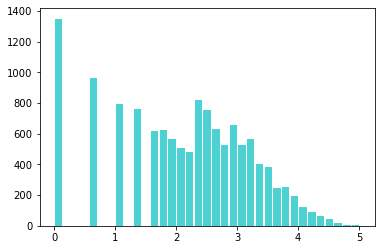

In [48]:
n6, bins6, patches6 = n_6,bins_6,patches_6 =plt.hist(x,density=False, bins=35, color='c',alpha=0.7, rwidth=0.85,histtype='bar')

In [49]:
bins_6,n_6

(array([0.        , 0.14335085, 0.2867017 , 0.43005256, 0.57340341,
        0.71675426, 0.86010511, 1.00345597, 1.14680682, 1.29015767,
        1.43350852, 1.57685938, 1.72021023, 1.86356108, 2.00691193,
        2.15026279, 2.29361364, 2.43696449, 2.58031534, 2.7236662 ,
        2.86701705, 3.0103679 , 3.15371875, 3.29706961, 3.44042046,
        3.58377131, 3.72712216, 3.87047302, 4.01382387, 4.15717472,
        4.30052557, 4.44387643, 4.58722728, 4.73057813, 4.87392898,
        5.01727984]),
 array([1349.,    0.,    0.,    0.,  962.,    0.,    0.,  794.,    0.,
         759.,    0.,  618.,  624.,  566.,  510.,  483.,  822.,  755.,
         629.,  527.,  657.,  527.,  568.,  402.,  382.,  249.,  252.,
         197.,  125.,   91.,   64.,   44.,   21.,    8.,    3.]))

In [26]:
i_v = np.unique(np.concatenate((log_interevent_binned[:])),return_counts = True)
i_v

(array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
        2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
        2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
        3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
        3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
        3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
        3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
        3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
        3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
        3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
        4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
        4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
        4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
        4.26267988, 4.27666612, 4.29045944, 4.30

In [29]:
bins_6[-1] = 5.02

In [30]:
bins_6

array([0.        , 0.14335085, 0.2867017 , 0.43005256, 0.57340341,
       0.71675426, 0.86010511, 1.00345597, 1.14680682, 1.29015767,
       1.43350852, 1.57685938, 1.72021023, 1.86356108, 2.00691193,
       2.15026279, 2.29361364, 2.43696449, 2.58031534, 2.7236662 ,
       2.86701705, 3.0103679 , 3.15371875, 3.29706961, 3.44042046,
       3.58377131, 3.72712216, 3.87047302, 4.01382387, 4.15717472,
       4.30052557, 4.44387643, 4.58722728, 4.73057813, 4.87392898,
       5.02      ])

In [31]:
counts_for_each_bin = np.zeros((len(log_interevent_binned),len(bins_6)-1))
for i in range(0,len(log_interevent_binned)):
    support = np.unique(log_interevent_binned[i],return_counts = True)
 #   print(support[0][-1])
    for j in range(0,len(support[0])):
        for k in range(0,len(bins_6)):
            print(bins_6[k])
            if (support[0][j]>= bins_6[k] and support[0][j]< bins_6[k+1]):
                #print(bins_6[k],bins_6[k+1])
                counts_for_each_bin[i][k] += support[1][j]
        
        

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.290157672323

2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.4300525574412792

2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.57340340992170

0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.4404

3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.0034559673629

2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.4300525574412792

3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.0034559673629

3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.57685937728

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822

1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.587227279

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.57685937728

1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.30052557

2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.4300525574412792

2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.87392898

0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2

4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.72021022976

1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.1571747

2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284

0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.006911934

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.30052557

0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.1

2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0

4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.72021022976

2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284

0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297

4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822

2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642


2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284

4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.1502627872

1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.72712

3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.290157672323

5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.72366619

1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.87047

2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.006911934

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.57340340992170

0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297

1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.87047

5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.72366619

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.57685937728

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.006911934

1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131

0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.58377

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.72021022976

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2

0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.1

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434

1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.587227279

0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2

2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.87392898

1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.1571747

3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.71675426240213

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.290157672323

0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.58377

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.72712

2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.57685937728

0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297

2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642


3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.290157672323

4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.006911934

1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.30052557

4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822

3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.0034559673629

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642


0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.72021022976

3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.433508524804

0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.4404

4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396

0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297

0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.4404

3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.72366619

0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.4404

4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.1502627872

3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.71675426240213

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.87392898

1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.1571747

4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.580315344

0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.7236661971281

3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.290157672323

1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.30052557

2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284

4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.86010511488255

2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131

1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.1571747

4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.72021022976

4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822

4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921

0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.0103679020889547
3.153718754569381
3.297069607049808
3.440420459530234
3.5837713120106605
3.727122164491087
3.8704730169715136
4.01382386945194
4.157174721932366
4.300525574412792
4.443876426893219
4.5872272793736455
4.730578131854072
4.873928984334499
5.02
0.0
0.14335085248042642
0.28670170496085284
0.43005255744127924
0.5734034099217057
0.7167542624021321
0.8601051148825585
1.003455967362985
1.1468068198434114
1.2901576723238377
1.4335085248042643
1.5768593772846906
1.720210229765117
1.8635610822455435
2.00691193472597
2.150262787206396
2.2936136396868227
2.4369644921672493
2.5803153446476754
2.723666197128102
2.8670170496085285
3.

In [437]:
counts_for_each_bin[0]

array([38.,  0., 13.,  0., 15., 10., 15., 10.,  7.,  6.,  2.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

NameError: name 'rainbow' is not defined

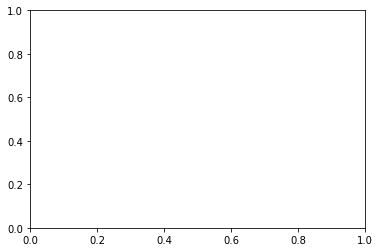

In [442]:
fig,ax = plt.subplots()
fig.colorbar(cm.rainbow(np.linspace(0, 1, len(counts_for_each_bin))),cmap=rainbow,ax=ax)

In [ ]:
coffee = np.array([5, 5, 7, 6, 7])
tea = np.array([1, 2, 0, 2, 0])
water = np.array([10, 12, 14, 12, 15])
names = ['Mary', 'Paul', 'Billy', 'Franka', 'Stephan']

fig = plt.figure(figsize=(6,5), dpi=200)
left, bottom, width, height = 0.2, 0.1, 0.7, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.35   
ticks = np.arange(len(names))    
ax.bar(ticks, tea, width, label='Coffee', bottom=water+coffee)
ax.bar(ticks, coffee, width, align="center", label='Tea', 
       bottom=water)
ax.bar(ticks, water, width, align="center", label='Water')

In [292]:
for j in range(0,len(bins_6)-1):
    s = bins_6[j]
    for i in range(0,len(logs)-1):
        for k in range(0,len(logs[i])-2):
            if(s>=logs[i][len(logs[i])-1]):
                yes_or_not[j][i] = 1
            elif(s>=logs[i][k] and s<logs[i][k+1]):
                yes_or_not[j][i] = 1

In [295]:
from matplotlib.pyplot import cm

In [ ]:
plt.figure(figsize=(20,20))
#plt.scatter(bins_6[:-1],n_6,marker='s')
#y = np.linspace(0,n_6[0],len(yes_or_not[0]))
colors = cm.inferno(np.linspace(0, 1, len(bins)-2))
#for i in range(0,len(bins)-2):
    supp = np.stack((yes_or_not[i],yes_or_not[i],yes_or_not[i],yes_or_not[i]), axis=-1)
    y = np.linspace(0,n_6[i],len(yes_or_not[0]))
    plt.scatter(bins_6[i]*np.ones(len(y)),y,marker='s',color = supp*colors[:])
plt.show()

In [446]:
vals

[[5.7, 5.7, 6.2, 6.2, 7.0],
 [1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  3.1,
  2.4,
  2.4,
  2.5,
  2.5,
  2.5,
  2.5,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.3,
  1.8,
  1.8,
  1.8,
  1.8,
  1.8,
  2.0,
  2.0,
  2.0,
  2.0,
  2.8,
  1.9,
  2.0,
  2.0,
  2.0,
  2.0,
  2.5,
  2.5,
  2.8,
  2.8],
 [2.8,
  3.1,
  4.2,
  2.4,
  2.4,
  3.1,
  3.5,
  3.6,
  2.4,
  2.4,
  2.4,
  2.4,
  2.5,
  2.5,
  3.3,
  2.5,
  2.5,
  3.5,
  3.5,
  3.0,
  3.0,
  3.5,
  3.1,
  3.8,
  3.8,
  3.8,
  5.3,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.5,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.6],
 [2.4, 3.0, 3.3, 3.3, 3.3, 3.3, 3.3, 3.8, 3.8, 3.8, 4.0],
 [3.7,
  3.7,
  3.9,
  3.9,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  5.7,
  5.9,
  4.2,
  4.2,
  4.6,
  4.6,
  4.6,
  5.4,
  5.4,
  2.7,
  2.7,
  2.7,
  3.4,
  3.4,
  4.0,
  4.0],
 [3.8,
  3.8,
  4.0,
  4.0,
  4.6,
  4.6,
  4.6,
  4.6,
  5.4,
 

In [32]:
import matplotlib as mpl


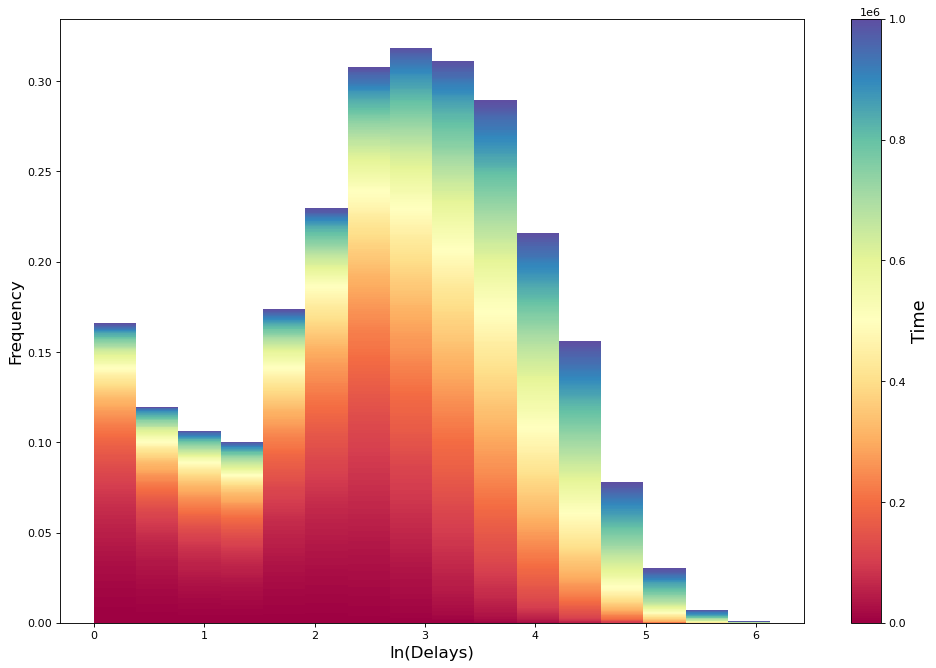

In [60]:

plt.figure(figsize=(15,10), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(log_interevent_binned)-1)) for i in range(len(log_interevent_binned))]
n, bins, patches = plt.hist(log_interevent_binned, 16, stacked=True ,density=True, color=colors[:len(log_interevent_binned)])
#plt.figure(figsize=(9, 1.5))
#fig, ax = plt.subplots(1, 1)
#ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

#colbar = plt.colorbar(ax.imshow(s,cmap='Spectral'))
#colbar.set_label('time')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral, norm=plt.Normalize(vmin=0, vmax=10**6))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Time', fontsize=16)


#fig, ax = plt.subplots(1, 1)
plt.xlabel('ln(Delays)',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
#fraction = 3  # .05

#norm = mpl.colors.Normalize(vmin=0, vmax=200000)
#cbar = ax.figure.colorbar(
#            mpl.cm.ScalarMappable(norm=norm, cmap='Spectral'),
#            ax=ax, pad=.05, extend='both', fraction=fraction,orientation='horizontal')

#ax.axis('off')
#plt.savefig('colorbar_0242_beta_best.png')
plt.show()



In [65]:
b=[(i/float(len(log_interevent_binned)-1)) for i in range(len(log_interevent_binned))]
len(b)

400

<Figure size 720x576 with 0 Axes>

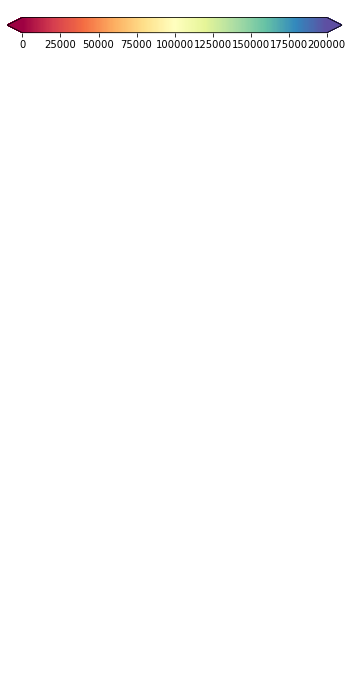

In [489]:
import matplotlib as mpl
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1, 1)

fraction = 4  # .05

norm = mpl.colors.Normalize(vmin=0, vmax=200000)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='Spectral'),
            ax=ax, pad=.05, extend='both', fraction=fraction,orientation='horizontal')

ax.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap='gist_ncar',
                               norm=mpl.colors.Normalize(0, 10),  # vmax and vmin
                               extend='both',
                               label='This is a label',
                               ticks=[0, 3, 6, 9])

plt.savefig('just_colorbar', bbox_inches='tight')

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.figure(figsize=(12,12))
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()


AttributeError: 'Figure' object has no attribute 'imshow'

<Figure size 864x864 with 0 Axes>

In [66]:
k=np.arange(1,401)*500

In [74]:
s = np.array([k,b])

In [55]:
200000/400

500.0

In [60]:
s = 

ValueError: maximum supported dimension for an ndarray is 32, found 400